In [3]:
import pandas as pd
import numpy as np
import timeit #imports timeit module
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut,cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report,f1_score,accuracy_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

def standardize(x): 
    
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df1 = pd.DataFrame(x_scaled)
    return(df1)

def ML_summary(Vars, model = None):
    
    #define X and y variables
    X = df.loc[:, Vars] 
    y = df.loc[:, "positive_negative"] 

    #standardize data
    X = standardize(X)

    #set the model
    if model == None:
        raise Exception("Needs Model")

    #set the CV
    kf = LeaveOneOut()
    
    #start timer for getting elapsed time
    from time import time
    import timeit #imports timeit module
    start_time = timeit.default_timer() #defines start time so computational time can be calculated

    #define lists
    acc_score = [];
    Truth = [];
    Output = [];

    #loop though each fold (so 40 times in our case)
    for train_index , test_index in kf.split(df):
        
        #split the data
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .25, shuffle=True)

        #print(X_train); print(X_test); print(y_train); print(y_test)
        
        #fit the model
        model.fit(X_train,y_train)
        
        #preduct values
        pred_values = model.predict(X_test)

        #append the accuracy score
        acc = accuracy_score(pred_values, y_test)
        acc_score.append(acc)

        #add to the truth and output
        Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
        Output.extend(pred_values); ## it is a list  
        

 
    #determine the time elapesed
    elapsed = timeit.default_timer() - start_time #gives total computation time

    #return the dataframe
    #test = pd.DataFrame(data={"Predicted:": Output, "Real": Truth})
    
    #set output to a dataframe
    dfOutput = pd.DataFrame(data={"Model": str(model),
                                  "X Variable(s)": [str(Vars),],
                                  "Avg Accuracy": [np.mean(acc_score),],
                                  "SD of Accuracy": [np.std(acc_score),],
                                  "Sensitivity": [recall_score(Truth,Output,pos_label="negative"),],
                                  "Precision": [precision_score(Truth,Output,pos_label="negative"),],
                                  "F1-Score": [f1_score(Truth,Output,pos_label="negative"),],
                                  "Runtime": [elapsed,],
                                  "Confusion_Matrix": str(confusion_matrix(Truth,Output))}) #,"Real Specificity": [1,]
    #return output
    #test = pd.DataFrame(data={"Predicted:": Output, "Real": Truth})
    
    return dfOutput


def ML_compare_variables(modelList,variableList):
    
    outputList = []
    
    for j in modelList:
        
        outputList1 = []
        
        for i in variableList :
            outputList1.append(ML_summary(i,j))
            
        outputList1 = pd.concat(outputList1, ignore_index = True)
        
        outputList.append(outputList1)
    
    outputList = pd.concat(outputList, ignore_index = True)
    
    
    return outputList.sort_values(by = "F1-Score",ascending=False)

In [4]:
df = pd.read_csv('Cataract Data 1.3.csv', na_values='?').dropna()
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["ogAA_letterCode"] = le.fit_transform(df.ogAA_letter)
df["mutAA_letterCode"] = le.fit_transform(df.mutAA_letter)
df["ogAA_charCode"] = le.fit_transform(df.ogAA_char)
df["mutAA_charCode"] = le.fit_transform(df.mutAA_char)

In [5]:
#summery of all vars
ML_summary(["pdel","iso_point","deldel_G1","deldel_G2","deldel_G3","positionAA_num","solv_area","evo_age"],RandomForestClassifier(max_depth=3))

#Compare all variables
ML_compare_variables([LogisticRegression(solver= 'liblinear', class_weight = 'balanced'),
                      neighbors.KNeighborsClassifier(n_neighbors = 3),
                      LinearDiscriminantAnalysis(),
                      DecisionTreeClassifier(max_depth=3),
                      BaggingClassifier(),
                      RandomForestClassifier(max_depth = 3),
                      AdaBoostClassifier(n_estimators=500, learning_rate = 0.1, algorithm="SAMME.R"),
                      GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 4),
                      SVC(C=1, kernel='linear')],
                           [["pdel","iso_point","deldel_G1","deldel_G2","deldel_G3","positionAA_num","solv_area","evo_age"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
5,RandomForestClassifier(max_depth=3),"['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.9100,0.073485,0.974790,0.885496,0.928000,6.997925,[[232 6]\n [ 30 132]]
3,DecisionTreeClassifier(max_depth=3),"['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.8800,0.087178,0.901460,0.921642,0.911439,0.160103,[[247 27]\n [ 21 105]]
6,"AdaBoostClassifier(learning_rate=0.1, n_estima...","['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.8775,0.110651,0.912214,0.901887,0.907021,35.043510,[[239 23]\n [ 26 112]]
4,BaggingClassifier(),"['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.8750,0.096825,0.917323,0.889313,0.903101,0.993370,[[233 21]\n [ 29 117]]
7,"GradientBoostingClassifier(max_depth=4, n_esti...","['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.8500,0.097468,0.900383,0.873606,0.886792,9.538576,[[235 26]\n [ 34 105]]
1,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.8175,0.118084,0.984674,0.788344,0.875639,0.235147,[[257 4]\n [ 69 70]]
8,"SVC(C=1, kernel='linear')","['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.8175,0.133954,0.976654,0.789308,0.873043,0.197954,[[251 6]\n [ 67 76]]
2,LinearDiscriminantAnalysis(),"['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.7725,0.109516,0.862903,0.789668,0.824663,0.284243,[[214 34]\n [ 57 95]]
0,"LogisticRegression(class_weight='balanced', so...","['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.7425,0.132075,0.734615,0.848889,0.787629,0.213992,[[191 69]\n [ 34 106]]


# Logistic Regression:

Coming out of the Exploratory Data Analysis, we knew that more linear classification models like logistic regression would not be the best fit for our data primarily due to the nonlinearity of variables like the isoelectric point. We tested it nonetheless and found our mini hypothesis to be true. After testing 15 different relevant double combinations of variables, like the isoelectric point and evolutionary age as pdel variables, we found that the best average accuracy rate of the logistic regression model was around 72.75% when it considered the variables pdel and $\Delta$$\Delta$G3 (the $\Delta$$\Delta$G values found by the INPS3D bioinformatics tool. It had a sensitivity of 0.70, precision of 0.87, and F1 score of approximately 0.78.

### duos

In [32]:
ML_compare_variables([LogisticRegression(solver= 'liblinear', class_weight = 'balanced')],[["iso_point", "pdel"],
                                                     ["iso_point", "solv_area"],
                                                     ["iso_point", "deldel_G1"],
                                                     ["iso_point", "deldel_G2"],
                                                     ["iso_point", "deldel_G3"],
                                                     ["iso_point", "ogAA_letterCode"],
                                                     ["pdel", "ogAA_letterCode"],
                                                     ["solv_area", "ogAA_letterCode"],
                                                     ["deldel_G3", "ogAA_letterCode"],
                                                     ["deldel_G2", "ogAA_letterCode"],
                                                     ["deldel_G1", "ogAA_letterCode"],
                                                     ["pdel", "deldel_G1"],
                                                     ["pdel", "deldel_G2"],
                                                     ["pdel", "deldel_G3"],
                                                     ["pdel", "solv_area"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
13,"LogisticRegression(class_weight='balanced', so...","['pdel', 'deldel_G3']",0.7275,0.104851,0.703297,0.872727,0.778905,0.111096,[[192 81]\n [ 28 99]]
0,"LogisticRegression(class_weight='balanced', so...","['iso_point', 'pdel']",0.7200,0.120830,0.671937,0.854271,0.752212,0.128899,[[170 83]\n [ 29 118]]
11,"LogisticRegression(class_weight='balanced', so...","['pdel', 'deldel_G1']",0.7125,0.116592,0.665306,0.831633,0.739229,0.102095,[[163 82]\n [ 33 122]]
4,"LogisticRegression(class_weight='balanced', so...","['iso_point', 'deldel_G3']",0.5750,0.197167,0.739777,0.665552,0.700704,0.111867,[[199 70]\n [100 31]]
6,"LogisticRegression(class_weight='balanced', so...","['pdel', 'ogAA_letterCode']",0.6550,0.162711,0.555556,0.892857,0.684932,0.104066,[[150 120]\n [ 18 112]]
8,"LogisticRegression(class_weight='balanced', so...","['deldel_G3', 'ogAA_letterCode']",0.5600,0.117898,0.671480,0.686347,0.678832,0.143116,[[186 91]\n [ 85 38]]
12,"LogisticRegression(class_weight='balanced', so...","['pdel', 'deldel_G2']",0.6550,0.149917,0.543726,0.888199,0.674528,0.108414,[[143 120]\n [ 18 119]]
5,"LogisticRegression(class_weight='balanced', so...","['iso_point', 'ogAA_letterCode']",0.5575,0.192208,0.709302,0.642105,0.674033,0.104357,[[183 75]\n [102 40]]
14,"LogisticRegression(class_weight='balanced', so...","['pdel', 'solv_area']",0.6400,0.157797,0.498069,0.902098,0.641791,0.124133,[[129 130]\n [ 14 127]]
1,"LogisticRegression(class_weight='balanced', so...","['iso_point', 'solv_area']",0.5250,0.189407,0.596899,0.641667,0.618474,0.123548,[[154 104]\n [ 86 56]]


### duos and trios
We tried out logistic regression models using not only combinations of two covariates but also combinations of three. But even taking those into consideration, _____.

In [26]:
ML_compare_variables([LogisticRegression(solver= 'liblinear', class_weight = 'balanced')],[["iso_point", "pdel"],
                                                     ["iso_point", "solv_area"],
                                                     ["iso_point", "deldel_G1"],
                                                     ["iso_point", "deldel_G2"],
                                                     ["iso_point", "deldel_G3"],
                                                     ["iso_point", "ogAA_letterCode"],
                                                     ["pdel", "ogAA_letterCode"],
                                                     ["solv_area", "ogAA_letterCode"],
                                                     ["deldel_G3", "ogAA_letterCode"],
                                                     ["deldel_G2", "ogAA_letterCode"],
                                                     ["deldel_G1", "ogAA_letterCode"],
                                                     ["pdel", "deldel_G1"],
                                                     ["pdel", "deldel_G2"],
                                                     ["pdel", "deldel_G3"],
                                                     ["pdel", "solv_area"],
                                                     ["pdel", "iso_point"],
                                                     ["solv_area", "deldel_G1"],
                                                     ["solv_area", "deldel_G2"],
                                                     ["solv_area", "deldel_G3"],
                                                     ["solv_area", "pdel"],
                                                     ["solv_area", "iso_point"],
                                                     ["pdel", "iso_point", "deldel_G3"],
                                                     ["pdel", "iso_point", "solv_area"],
                                                     ["pdel", "iso_point", "ogAA_letterCode"],
                                                     ["pdel", "iso_point", "deldel_G1"],
                                                     ["pdel", "iso_point", "deldel_G2"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
21,"LogisticRegression(class_weight='balanced', so...","['pdel', 'iso_point', 'deldel_G3']",0.7775,0.133206,0.775100,0.853982,0.812632,0.226672,[[193 56]\n [ 33 118]]
13,"LogisticRegression(class_weight='balanced', so...","['pdel', 'deldel_G3']",0.7500,0.111803,0.738776,0.834101,0.783550,0.262072,[[181 64]\n [ 36 119]]
24,"LogisticRegression(class_weight='balanced', so...","['pdel', 'iso_point', 'deldel_G1']",0.6975,0.125474,0.654762,0.829146,0.731707,0.223842,[[165 87]\n [ 34 114]]
15,"LogisticRegression(class_weight='balanced', so...","['pdel', 'iso_point']",0.6800,0.141774,0.666667,0.809302,0.731092,0.210712,[[174 87]\n [ 41 98]]
0,"LogisticRegression(class_weight='balanced', so...","['iso_point', 'pdel']",0.6825,0.164146,0.632959,0.853535,0.726882,0.226691,[[169 98]\n [ 29 104]]
4,"LogisticRegression(class_weight='balanced', so...","['iso_point', 'deldel_G3']",0.5925,0.211409,0.790262,0.663522,0.721368,0.275878,[[211 56]\n [107 26]]
25,"LogisticRegression(class_weight='balanced', so...","['pdel', 'iso_point', 'deldel_G2']",0.6700,0.141774,0.647510,0.808612,0.719149,0.210248,[[169 92]\n [ 40 99]]
23,"LogisticRegression(class_weight='balanced', so...","['pdel', 'iso_point', 'ogAA_letterCode']",0.6950,0.134071,0.581749,0.927273,0.714953,0.242839,[[153 110]\n [ 12 125]]
22,"LogisticRegression(class_weight='balanced', so...","['pdel', 'iso_point', 'solv_area']",0.6450,0.148240,0.575188,0.840659,0.683036,0.242959,[[153 113]\n [ 29 105]]
11,"LogisticRegression(class_weight='balanced', so...","['pdel', 'deldel_G1']",0.6650,0.162096,0.553846,0.888889,0.682464,0.239605,[[144 116]\n [ 18 122]]


# KNN:
Prior to training models, we knew that KNN, or K-nearest neighbor, models would fit our data better (primarily due to its friendliness to nonlinearity). The figures prove as such; 13 of 21 combinations of covariates provided a model with an average accuracy higher than 90%. The model with the dual combination of isoelectric point and pdel as covariates showed, on average and most consistently, the highest accuracy and F1 score of approximately 95% and 0.96, respectively. The sensitivity was 1.0 and the precision was 0.93. From the KNN models, we found that our mini hypothesis from our Exploratory Data Analysis was correct. Isoelectric point was consistently a covariate of each combination of covariates that provided the models with the highest accuracy, showing that it was a variable with high predictive power. When we compared the "top" lists for each leading covariate (ie. isoelectric point and one of either pdel, solvent area, the $\Delta$$\Delta$G's, or the original amino acid letter codified with a numerical variable), the models with isoelectric point as a covariate consistently had the highest average accuracies. The models with pdel as a covariate had the second highest average accuracies, with the $\Delta$$\Delta$G's trailing behind. It was testing the KNN models where we realized that the highest accuracy may hover around 95%; there are two outlier data points for isoelectric values between positive and negative groups. The reason for why they are outliers are likely to be found with further biological and biotechnological research. No matter the combination of numerical covariates, the accuracy hovered around 0.95 (aside from the occassional and lucky 96% or 97%). 

In [20]:
def KNN_find_best_k(inputList,_max):
    
    outputList = [pd.DataFrame(data={"X Variable(s)": [inputList,],
                                      "Avg Accuracy": 0.0,
                                      "SD of Accuracy": 0.0,
                                      "Sensitivity": 0.0,
                                      "Precision": 0.0,
                                      "F1-Score": 0.0,
                                      "Runtime": 0.0,
                                      "Confusion_Matrix": "none"})] #,"Real Specificity": [1,]
    
    for i in range(1,_max):
        
        tempList = []
        
        for j in range(10):
            tempList.append(ML_summary(inputList,neighbors.KNeighborsClassifier(n_neighbors = i)))
            
        tempList = pd.concat(tempList, ignore_index=True)

        outputList.append(tempList.head(1))

    outputList = pd.concat(outputList, ignore_index=True)
    
    return outputList.sort_values(by = "F1-Score",ascending=False)

KNN_find_best_k(["deldel_G3","iso_point"],5)

,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix,Model
3,"['deldel_G3', 'iso_point']",0.9400,0.086023,1.000000,0.916376,0.956364,0.130837,[[263 0]\n [ 24 113]],KNeighborsClassifier(n_neighbors=3)
2,"['deldel_G3', 'iso_point']",0.9275,0.083629,1.000000,0.903654,0.949389,0.129888,[[272 0]\n [ 29 99]],KNeighborsClassifier(n_neighbors=2)
4,"['deldel_G3', 'iso_point']",0.8875,0.114428,1.000000,0.851974,0.920071,0.143085,[[259 0]\n [ 45 96]],KNeighborsClassifier(n_neighbors=4)
1,"['deldel_G3', 'iso_point']",0.8650,0.088176,0.918288,0.877323,0.897338,0.148689,[[236 21]\n [ 33 110]],KNeighborsClassifier(n_neighbors=1)
0,"[deldel_G3, iso_point]",0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,none,NaN


### isoelectric point

In [18]:
ML_compare_variables([neighbors.KNeighborsClassifier(n_neighbors = 3)],[["iso_point", "pdel"],
                                                                        ["iso_point", "solv_area"],
                                                                        ["iso_point", "deldel_G1"],
                                                                        ["iso_point", "deldel_G2"],
                                                                        ["iso_point", "deldel_G3"],
                                                                        ["iso_point", "ogAA_letterCode"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
5,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'ogAA_letterCode']",0.9575,0.058683,1.0,0.939716,0.968921,0.137418,[[265 0]\n [ 17 118]]
4,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'deldel_G3']",0.9400,0.080000,1.0,0.915789,0.956044,0.130572,[[261 0]\n [ 24 115]]
0,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'pdel']",0.9375,0.085696,1.0,0.911972,0.953959,0.155871,[[259 0]\n [ 25 116]]
2,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'deldel_G1']",0.9225,0.075788,1.0,0.888889,0.941176,0.127302,[[248 0]\n [ 31 121]]
1,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'solv_area']",0.9175,0.086277,1.0,0.883392,0.938086,0.128799,[[250 0]\n [ 33 117]]
3,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'deldel_G2']",0.8975,0.068875,1.0,0.862876,0.926391,0.166820,[[258 0]\n [ 41 101]]


### original AA letter

In [6]:
ML_compare_variables([neighbors.KNeighborsClassifier(n_neighbors = 3)],[["iso_point", "ogAA_letterCode"],
                                                                        ["pdel", "ogAA_letterCode"],
                                                                        ["solv_area", "ogAA_letterCode"],
                                                                        ["deldel_G3", "ogAA_letterCode"],
                                                                        ["deldel_G2", "ogAA_letterCode"],
                                                                        ["deldel_G1", "ogAA_letterCode"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
0,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'ogAA_letterCode']",0.9650,0.057228,1.000000,0.947566,0.973077,0.219670,[[253 0]\n [ 14 133]]
1,KNeighborsClassifier(n_neighbors=3),"['pdel', 'ogAA_letterCode']",0.8275,0.124474,0.882591,0.844961,0.863366,0.187029,[[218 29]\n [ 40 113]]
2,KNeighborsClassifier(n_neighbors=3),"['solv_area', 'ogAA_letterCode']",0.7275,0.132264,0.812261,0.779412,0.795497,0.220844,[[212 49]\n [ 60 79]]
5,KNeighborsClassifier(n_neighbors=3),"['deldel_G1', 'ogAA_letterCode']",0.7125,0.118717,0.772201,0.781250,0.776699,0.210835,[[200 59]\n [ 56 85]]
3,KNeighborsClassifier(n_neighbors=3),"['deldel_G3', 'ogAA_letterCode']",0.6850,0.131434,0.780488,0.727273,0.752941,0.172802,[[192 54]\n [ 72 82]]
4,KNeighborsClassifier(n_neighbors=3),"['deldel_G2', 'ogAA_letterCode']",0.6625,0.149478,0.765625,0.723247,0.743833,0.257036,[[196 60]\n [ 75 69]]


### $\Delta$$\Delta$G's

In [5]:
ML_compare_variables([neighbors.KNeighborsClassifier(n_neighbors = 3)],[["deldel_G3", "iso_point"],
                                                                        ["deldel_G3", "pdel"],
                                                                        ["deldel_G3", "ogAA_letterCode"],
                                                                        ["deldel_G3", "solv_area"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
0,KNeighborsClassifier(n_neighbors=3),"['deldel_G3', 'iso_point']",0.9175,0.102195,1.000000,0.882143,0.937381,0.270752,[[247 0]\n [ 33 120]]
1,KNeighborsClassifier(n_neighbors=3),"['deldel_G3', 'pdel']",0.8575,0.097179,0.879245,0.903101,0.891013,0.251880,[[233 32]\n [ 25 110]]
2,KNeighborsClassifier(n_neighbors=3),"['deldel_G3', 'ogAA_letterCode']",0.6775,0.145752,0.813230,0.720690,0.764168,0.306387,[[209 48]\n [ 81 62]]
3,KNeighborsClassifier(n_neighbors=3),"['deldel_G3', 'solv_area']",0.6525,0.113990,0.798479,0.709459,0.751342,0.256802,[[210 53]\n [ 86 51]]


### pdel

In [21]:
ML_compare_variables([neighbors.KNeighborsClassifier(n_neighbors = 3)],[["pdel", "iso_point"],
                                                                        ["pdel", "deldel_G1"],
                                                                        ["pdel", "deldel_G2"],
                                                                        ["pdel", "deldel_G3"],
                                                                        ["pdel", "solv_area"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
0,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point']",0.9475,0.067035,1.000000,0.924460,0.960748,0.135181,[[257 0]\n [ 21 122]]
1,KNeighborsClassifier(n_neighbors=3),"['pdel', 'deldel_G1']",0.8400,0.091652,0.905138,0.851301,0.877395,0.133344,[[229 24]\n [ 40 107]]
4,KNeighborsClassifier(n_neighbors=3),"['pdel', 'solv_area']",0.8225,0.096144,0.885375,0.842105,0.863198,0.137828,[[224 29]\n [ 42 105]]
3,KNeighborsClassifier(n_neighbors=3),"['pdel', 'deldel_G3']",0.8275,0.086566,0.850980,0.875000,0.862823,0.123834,[[217 38]\n [ 31 114]]
2,KNeighborsClassifier(n_neighbors=3),"['pdel', 'deldel_G2']",0.8150,0.096307,0.883721,0.838235,0.860377,0.177710,[[228 30]\n [ 44 98]]


### trios

In [51]:
ML_compare_variables([neighbors.KNeighborsClassifier(n_neighbors = 3)],[["pdel", "iso_point", "deldel_G3"],
                                                                        ["pdel", "iso_point", "solv_area"],
                                                                        ["pdel", "iso_point", "ogAA_letterCode"],
                                                                        ["pdel", "iso_point", "deldel_G1"],
                                                                        ["pdel", "iso_point", "deldel_G2"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
2,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point', 'ogAA_letterCode']",0.9475,0.059108,1.0,0.929054,0.963222,0.178630,[[275 0]\n [ 21 104]]
3,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point', 'deldel_G1']",0.9475,0.086566,1.0,0.928328,0.962832,0.143992,[[272 0]\n [ 21 107]]
0,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point', 'deldel_G3']",0.9425,0.080273,1.0,0.917857,0.957169,0.165192,[[257 0]\n [ 23 120]]
4,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point', 'deldel_G2']",0.9325,0.078700,1.0,0.906574,0.950998,0.140353,[[262 0]\n [ 27 111]]
1,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point', 'solv_area']",0.9200,0.090000,1.0,0.892617,0.943262,0.138490,[[266 0]\n [ 32 102]]


### all the duos

In [49]:
ML_compare_variables([neighbors.KNeighborsClassifier(n_neighbors = 3)],[["iso_point", "pdel"],
                                                     ["iso_point", "solv_area"],
                                                     ["iso_point", "deldel_G1"],
                                                     ["iso_point", "deldel_G2"],
                                                     ["iso_point", "deldel_G3"],
                                                     ["iso_point", "ogAA_letterCode"],
                                                     ["pdel", "ogAA_letterCode"],
                                                     ["solv_area", "ogAA_letterCode"],
                                                     ["deldel_G3", "ogAA_letterCode"],
                                                     ["deldel_G2", "ogAA_letterCode"],
                                                     ["deldel_G1", "ogAA_letterCode"],
                                                     ["pdel", "deldel_G1"],
                                                     ["pdel", "deldel_G2"],
                                                     ["pdel", "deldel_G3"],
                                                     ["pdel", "solv_area"],
                                                     ["pdel", "iso_point"],
                                                     ["solv_area", "deldel_G1"],
                                                     ["solv_area", "deldel_G2"],
                                                     ["solv_area", "deldel_G3"],
                                                     ["solv_area", "pdel"],
                                                     ["solv_area", "iso_point"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
0,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'pdel']",0.9550,0.058949,1.000000,0.936170,0.967033,0.151299,[[264 0]\n [ 18 118]]
4,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'deldel_G3']",0.9450,0.070534,1.000000,0.922261,0.959559,0.156136,[[261 0]\n [ 22 117]]
20,KNeighborsClassifier(n_neighbors=3),"['solv_area', 'iso_point']",0.9350,0.096307,1.000000,0.912162,0.954064,0.143282,[[270 0]\n [ 26 104]]
15,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point']",0.9400,0.091652,1.000000,0.911111,0.953488,0.148709,[[246 0]\n [ 24 130]]
2,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'deldel_G1']",0.9350,0.072629,1.000000,0.910345,0.953069,0.167611,[[264 0]\n [ 26 110]]
1,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'solv_area']",0.9300,0.092736,1.000000,0.905085,0.950178,0.135370,[[267 0]\n [ 28 105]]
5,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'ogAA_letterCode']",0.9300,0.095394,1.000000,0.903114,0.949091,0.153571,[[261 0]\n [ 28 111]]
3,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'deldel_G2']",0.9275,0.074120,1.000000,0.902027,0.948490,0.165324,[[267 0]\n [ 29 104]]
14,KNeighborsClassifier(n_neighbors=3),"['pdel', 'solv_area']",0.8600,0.070000,0.890152,0.896947,0.893536,0.124204,[[235 29]\n [ 27 109]]
6,KNeighborsClassifier(n_neighbors=3),"['pdel', 'ogAA_letterCode']",0.8500,0.097468,0.894942,0.874525,0.884615,0.151983,[[230 27]\n [ 33 110]]


### duos and trios

In [4]:
ML_compare_variables([neighbors.KNeighborsClassifier(n_neighbors = 3)],[["iso_point", "pdel"],
                                                     ["iso_point", "solv_area"],
                                                     ["iso_point", "deldel_G1"],
                                                     ["iso_point", "deldel_G2"],
                                                     ["iso_point", "deldel_G3"],
                                                     ["iso_point", "ogAA_letterCode"],
                                                     ["pdel", "ogAA_letterCode"],
                                                     ["solv_area", "ogAA_letterCode"],
                                                     ["deldel_G3", "ogAA_letterCode"],
                                                     ["deldel_G2", "ogAA_letterCode"],
                                                     ["deldel_G1", "ogAA_letterCode"],
                                                     ["pdel", "deldel_G1"],
                                                     ["pdel", "deldel_G2"],
                                                     ["pdel", "deldel_G3"],
                                                     ["pdel", "solv_area"],
                                                     ["pdel", "iso_point"],
                                                     ["solv_area", "deldel_G1"],
                                                     ["solv_area", "deldel_G2"],
                                                     ["solv_area", "deldel_G3"],
                                                     ["solv_area", "pdel"],
                                                     ["solv_area", "iso_point"],
                                                     ["pdel", "iso_point", "deldel_G3"],
                                                     ["pdel", "iso_point", "solv_area"],
                                                     ["pdel", "iso_point", "ogAA_letterCode"],
                                                     ["pdel", "iso_point", "deldel_G1"],
                                                     ["pdel", "iso_point", "deldel_G2"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
23,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point', 'ogAA_letterCode']",0.9500,0.059161,1.000000,0.929078,0.963235,0.427897,[[262 0]\n [ 20 118]]
5,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'ogAA_letterCode']",0.9500,0.059161,1.000000,0.928058,0.962687,0.471618,[[258 0]\n [ 20 122]]
4,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'deldel_G3']",0.9475,0.049937,1.000000,0.925795,0.961468,0.444688,[[262 0]\n [ 21 117]]
25,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point', 'deldel_G2']",0.9450,0.066895,1.000000,0.924399,0.960714,0.431576,[[269 0]\n [ 22 109]]
15,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point']",0.9425,0.058683,1.000000,0.923333,0.960139,0.495844,[[277 0]\n [ 23 100]]
24,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point', 'deldel_G1']",0.9400,0.073485,1.000000,0.919192,0.957895,0.450667,[[273 0]\n [ 24 103]]
21,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point', 'deldel_G3']",0.9375,0.088565,1.000000,0.918301,0.957411,0.437806,[[281 0]\n [ 25 94]]
2,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'deldel_G1']",0.9400,0.062450,1.000000,0.918089,0.957295,0.444260,[[269 0]\n [ 24 107]]
20,KNeighborsClassifier(n_neighbors=3),"['solv_area', 'iso_point']",0.9375,0.065907,1.000000,0.914384,0.955277,0.498229,[[267 0]\n [ 25 108]]
1,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'solv_area']",0.9375,0.061998,1.000000,0.912281,0.954128,0.428261,[[260 0]\n [ 25 115]]


# LDA:
What applied to logistic regression models applied to LDA, or Linear Discriminant Analysis, models as well. Since LDA models work linearly, we predicted that they would not be able to best classify our data, especially when using the isoelectric point values. Testing the same combinations of covariates applied to previous models, we found that the best LDA model only had an average accuracy of 87.25%, F1 score of 0.91, sensitivity of 0.91, and precision of 0.90.

### duos

In [48]:
ML_compare_variables([LinearDiscriminantAnalysis()],[["iso_point", "pdel"],
                                                     ["iso_point", "solv_area"],
                                                     ["iso_point", "deldel_G1"],
                                                     ["iso_point", "deldel_G2"],
                                                     ["iso_point", "deldel_G3"],
                                                     ["iso_point", "ogAA_letterCode"],
                                                     ["pdel", "ogAA_letterCode"],
                                                     ["solv_area", "ogAA_letterCode"],
                                                     ["deldel_G3", "ogAA_letterCode"],
                                                     ["deldel_G2", "ogAA_letterCode"],
                                                     ["deldel_G1", "ogAA_letterCode"],
                                                     ["pdel", "deldel_G1"],
                                                     ["pdel", "deldel_G2"],
                                                     ["pdel", "deldel_G3"],
                                                     ["pdel", "solv_area"],
                                                     ["pdel", "iso_point"],
                                                     ["solv_area", "deldel_G1"],
                                                     ["solv_area", "deldel_G2"],
                                                     ["solv_area", "deldel_G3"],
                                                     ["solv_area", "pdel"],
                                                     ["solv_area", "iso_point"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
11,LinearDiscriminantAnalysis(),"['pdel', 'deldel_G1']",0.8750,0.101858,0.891791,0.919231,0.905303,0.146610,[[239 29]\n [ 21 111]]
13,LinearDiscriminantAnalysis(),"['pdel', 'deldel_G3']",0.8700,0.090000,0.902985,0.902985,0.902985,0.137523,[[242 26]\n [ 26 106]]
12,LinearDiscriminantAnalysis(),"['pdel', 'deldel_G2']",0.8675,0.105801,0.903101,0.892720,0.897881,0.126438,[[233 25]\n [ 28 114]]
19,LinearDiscriminantAnalysis(),"['solv_area', 'pdel']",0.8625,0.104133,0.892720,0.896154,0.894434,0.129302,[[233 28]\n [ 27 112]]
6,LinearDiscriminantAnalysis(),"['pdel', 'ogAA_letterCode']",0.8375,0.123870,0.883721,0.866920,0.875240,0.130291,[[228 30]\n [ 35 107]]
14,LinearDiscriminantAnalysis(),"['pdel', 'solv_area']",0.8250,0.117792,0.873950,0.838710,0.855967,0.155416,[[208 30]\n [ 40 122]]
15,LinearDiscriminantAnalysis(),"['pdel', 'iso_point']",0.8025,0.131315,0.920949,0.797945,0.855046,0.122178,[[233 20]\n [ 59 88]]
0,LinearDiscriminantAnalysis(),"['iso_point', 'pdel']",0.8100,0.151327,0.925311,0.793594,0.854406,0.130255,[[223 18]\n [ 58 101]]
4,LinearDiscriminantAnalysis(),"['iso_point', 'deldel_G3']",0.6750,0.115650,0.973485,0.676316,0.798137,0.110919,[[257 7]\n [123 13]]
9,LinearDiscriminantAnalysis(),"['deldel_G2', 'ogAA_letterCode']",0.6425,0.124273,0.921053,0.667575,0.774092,0.141547,[[245 21]\n [122 12]]


### trios

In [31]:
ML_compare_variables([LinearDiscriminantAnalysis()],[["pdel", "iso_point", "deldel_G3"],
                                                     ["pdel", "iso_point", "solv_area"],
                                                     ["pdel", "iso_point", "ogAA_letterCode"],
                                                     ["pdel", "iso_point", "deldel_G1"],
                                                     ["pdel", "iso_point", "deldel_G2"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
3,LinearDiscriminantAnalysis(),"['pdel', 'iso_point', 'deldel_G1']",0.8325,0.095884,0.885932,0.862963,0.874296,0.144218,[[233 30]\n [ 37 100]]
1,LinearDiscriminantAnalysis(),"['pdel', 'iso_point', 'solv_area']",0.8100,0.128062,0.907749,0.828283,0.866197,0.118183,[[246 25]\n [ 51 78]]
4,LinearDiscriminantAnalysis(),"['pdel', 'iso_point', 'deldel_G2']",0.8175,0.118084,0.914397,0.821678,0.865562,0.147608,[[235 22]\n [ 51 92]]
2,LinearDiscriminantAnalysis(),"['pdel', 'iso_point', 'ogAA_letterCode']",0.8050,0.135923,0.866935,0.826923,0.846457,0.157242,[[215 33]\n [ 45 107]]
0,LinearDiscriminantAnalysis(),"['pdel', 'iso_point', 'deldel_G3']",0.7600,0.144568,0.897959,0.756014,0.820896,0.147014,[[220 25]\n [ 71 84]]


### duos and trios

In [7]:
ML_compare_variables([LinearDiscriminantAnalysis()],[["iso_point", "pdel"],
                                                     ["iso_point", "solv_area"],
                                                     ["iso_point", "deldel_G1"],
                                                     ["iso_point", "deldel_G2"],
                                                     ["iso_point", "deldel_G3"],
                                                     ["iso_point", "ogAA_letterCode"],
                                                     ["pdel", "ogAA_letterCode"],
                                                     ["solv_area", "ogAA_letterCode"],
                                                     ["deldel_G3", "ogAA_letterCode"],
                                                     ["deldel_G2", "ogAA_letterCode"],
                                                     ["deldel_G1", "ogAA_letterCode"],
                                                     ["pdel", "deldel_G1"],
                                                     ["pdel", "deldel_G2"],
                                                     ["pdel", "deldel_G3"],
                                                     ["pdel", "solv_area"],
                                                     ["pdel", "iso_point"],
                                                     ["solv_area", "deldel_G1"],
                                                     ["solv_area", "deldel_G2"],
                                                     ["solv_area", "deldel_G3"],
                                                     ["solv_area", "pdel"],
                                                     ["solv_area", "iso_point"],
                                                     ["pdel", "iso_point", "deldel_G3"],
                                                     ["pdel", "iso_point", "solv_area"],
                                                     ["pdel", "iso_point", "ogAA_letterCode"],
                                                     ["pdel", "iso_point", "deldel_G1"],
                                                     ["pdel", "iso_point", "deldel_G2"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
19,LinearDiscriminantAnalysis(),"['solv_area', 'pdel']",0.8725,0.083629,0.912088,0.902174,0.907104,0.149611,[[249 24]\n [ 27 100]]
14,LinearDiscriminantAnalysis(),"['pdel', 'solv_area']",0.8550,0.126392,0.884328,0.897727,0.890977,0.127884,[[237 31]\n [ 27 105]]
6,LinearDiscriminantAnalysis(),"['pdel', 'ogAA_letterCode']",0.8475,0.111775,0.895131,0.878676,0.886827,0.123377,[[239 28]\n [ 33 100]]
11,LinearDiscriminantAnalysis(),"['pdel', 'deldel_G1']",0.8475,0.099969,0.879377,0.882812,0.881092,0.129686,[[226 31]\n [ 30 113]]
13,LinearDiscriminantAnalysis(),"['pdel', 'deldel_G3']",0.8300,0.097980,0.874539,0.874539,0.874539,0.148632,[[237 34]\n [ 34 95]]
25,LinearDiscriminantAnalysis(),"['pdel', 'iso_point', 'deldel_G2']",0.8300,0.110000,0.911538,0.840426,0.874539,0.116591,[[237 23]\n [ 45 95]]
15,LinearDiscriminantAnalysis(),"['pdel', 'iso_point']",0.8325,0.123263,0.935743,0.820423,0.874296,0.141495,[[233 16]\n [ 51 100]]
23,LinearDiscriminantAnalysis(),"['pdel', 'iso_point', 'ogAA_letterCode']",0.8225,0.108369,0.869091,0.872263,0.870674,0.143389,[[239 36]\n [ 35 90]]
12,LinearDiscriminantAnalysis(),"['pdel', 'deldel_G2']",0.8325,0.100964,0.870588,0.867188,0.868885,0.115613,[[222 33]\n [ 34 111]]
24,LinearDiscriminantAnalysis(),"['pdel', 'iso_point', 'deldel_G1']",0.8150,0.129518,0.897338,0.833922,0.864469,0.154713,[[236 27]\n [ 47 90]]


# Basic Decision Tree:

6 is best max_depth

For decision tree classifiers, we tested all our variables together rather than choose specific ones as covariates____insert reason why____. We found that 

In [170]:
def basticDT_find_best_k(inputList,_max):
    
    outputList = [pd.DataFrame(data={"X Variable(s)": [inputList,],
                                      "Avg Accuracy": 0.0,
                                      "SD of Accuracy": 0.0,
                                      "Sensitivity": 0.0,
                                      "Precision": 0.0,
                                      "F1-Score": 0.0,
                                      "Runtime": 0.0,
                                      "Confusion_Matrix": "none"})] #,"Real Specificity": [1,]
    
    for i in range(1,_max):
        
        tempList = []
        
        for j in range(20):
            tempList.append(ML_summary(inputList,DecisionTreeClassifier(max_depth=i)))
            
        tempList = pd.concat(tempList, ignore_index=True)

        outputList.append(tempList.head(1))

    outputList = pd.concat(outputList, ignore_index=True)
    
    return outputList.sort_values(by = "F1-Score",ascending=False)

basticDT_find_best_k(["pdel","iso_point","deldel_G1","deldel_G2","deldel_G3","positionAA_num","solv_area","evo_age"],10)

,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix,Model
2,"['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.8700,0.112250,0.914498,0.894545,0.904412,0.124251,[[246 23]\n [ 29 102]],DecisionTreeClassifier(max_depth=2)
6,"['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.8775,0.101211,0.901575,0.905138,0.903353,0.124536,[[229 25]\n [ 24 122]],DecisionTreeClassifier(max_depth=6)
7,"['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.8600,0.101980,0.903346,0.890110,0.896679,0.119770,[[243 26]\n [ 30 101]],DecisionTreeClassifier(max_depth=7)
8,"['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.8575,0.099718,0.906015,0.882784,0.894249,0.122381,[[241 25]\n [ 32 102]],DecisionTreeClassifier(max_depth=8)
4,"['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.8650,0.115217,0.890196,0.897233,0.893701,0.120866,[[227 28]\n [ 26 119]],DecisionTreeClassifier(max_depth=4)
5,"['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.8550,0.126392,0.896552,0.883019,0.889734,0.119316,[[234 27]\n [ 31 108]],DecisionTreeClassifier(max_depth=5)
3,"['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.8550,0.113908,0.887597,0.887597,0.887597,0.123866,[[229 29]\n [ 29 113]],DecisionTreeClassifier(max_depth=3)
9,"['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.8400,0.091652,0.861660,0.882591,0.872000,0.120278,[[218 35]\n [ 29 118]],DecisionTreeClassifier(max_depth=9)
1,"['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.7625,0.101704,0.836735,0.788462,0.811881,0.127687,[[205 40]\n [ 55 100]],DecisionTreeClassifier(max_depth=1)
0,"[pdel, iso_point, deldel_G1, deldel_G2, deldel...",0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,none,NaN


In [16]:
ML_summary(["pdel","iso_point","deldel_G1","deldel_G2","deldel_G3","positionAA_num","solv_area","evo_age"],DecisionTreeClassifier(max_depth=6))

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
0,DecisionTreeClassifier(max_depth=6),"['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.86,0.122066,0.910569,0.868217,0.888889,0.110771,[[224 22]\n [ 34 120]]


In [13]:
ML_compare_variables([DecisionTreeClassifier(max_depth=6)],[["iso_point", "pdel"],
                                                     ["iso_point", "solv_area"],
                                                     ["iso_point", "deldel_G1"],
                                                     ["iso_point", "deldel_G2"],
                                                     ["iso_point", "deldel_G3"],
                                                     ["iso_point", "ogAA_letterCode"],
                                                     ["pdel", "ogAA_letterCode"],
                                                     ["solv_area", "ogAA_letterCode"],
                                                     ["deldel_G3", "ogAA_letterCode"],
                                                     ["deldel_G2", "ogAA_letterCode"],
                                                     ["deldel_G1", "ogAA_letterCode"],
                                                     ["pdel", "deldel_G1"],
                                                     ["pdel", "deldel_G2"],
                                                     ["pdel", "deldel_G3"],
                                                     ["pdel", "solv_area"],
                                                     ["pdel", "iso_point"],
                                                     ["solv_area", "deldel_G1"],
                                                     ["solv_area", "deldel_G2"],
                                                     ["solv_area", "deldel_G3"],
                                                     ["solv_area", "pdel"],
                                                     ["solv_area", "iso_point"],
                                                     ["pdel", "iso_point", "deldel_G3"],
                                                     ["pdel", "iso_point", "solv_area"],
                                                     ["pdel", "iso_point", "ogAA_letterCode"],
                                                     ["pdel", "iso_point", "deldel_G1"],
                                                     ["pdel", "iso_point", "deldel_G2"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
15,DecisionTreeClassifier(max_depth=6),"['pdel', 'iso_point']",0.9325,0.087714,0.969925,0.931408,0.950276,0.146740,[[258 8]\n [ 19 115]]
0,DecisionTreeClassifier(max_depth=6),"['iso_point', 'pdel']",0.9225,0.085110,0.992647,0.903010,0.945709,0.128554,[[270 2]\n [ 29 99]]
23,DecisionTreeClassifier(max_depth=6),"['pdel', 'iso_point', 'ogAA_letterCode']",0.9050,0.086458,0.956693,0.900000,0.927481,0.137913,[[243 11]\n [ 27 119]]
5,DecisionTreeClassifier(max_depth=6),"['iso_point', 'ogAA_letterCode']",0.8975,0.106037,0.950382,0.898917,0.923933,0.137476,[[249 13]\n [ 28 110]]
2,DecisionTreeClassifier(max_depth=6),"['iso_point', 'deldel_G1']",0.9050,0.070534,0.919028,0.926531,0.922764,0.129981,[[227 20]\n [ 18 135]]
7,DecisionTreeClassifier(max_depth=6),"['solv_area', 'ogAA_letterCode']",0.9000,0.126491,0.893130,0.951220,0.921260,0.154946,[[234 28]\n [ 12 126]]
3,DecisionTreeClassifier(max_depth=6),"['iso_point', 'deldel_G2']",0.8900,0.117898,0.949612,0.887681,0.917603,0.129996,[[245 13]\n [ 31 111]]
4,DecisionTreeClassifier(max_depth=6),"['iso_point', 'deldel_G3']",0.8825,0.104612,0.898113,0.922481,0.910134,0.129252,[[238 27]\n [ 20 115]]
1,DecisionTreeClassifier(max_depth=6),"['iso_point', 'solv_area']",0.8825,0.086277,0.878327,0.939024,0.907662,0.137472,[[231 32]\n [ 15 122]]
6,DecisionTreeClassifier(max_depth=6),"['pdel', 'ogAA_letterCode']",0.8750,0.125996,0.908046,0.901141,0.904580,0.138388,[[237 24]\n [ 26 113]]


# Bagging Decision Tree:

In [19]:
ML_summary(["pdel","iso_point","deldel_G1","deldel_G2","deldel_G3","positionAA_num","solv_area","evo_age"],BaggingClassifier())

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
0,BaggingClassifier(),"['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.8925,0.090519,0.932836,0.909091,0.92081,0.735203,[[250 18]\n [ 25 107]]


In [ ]:
ML_compare_variables([BaggingClassifier()],[["pdel","iso_point","deldel_G1","deldel_G2","deldel_G3","positionAA_num","solv_area","evo_age"]])

In [20]:
ML_compare_variables([BaggingClassifier()],[["iso_point", "pdel"],
                                                     ["iso_point", "solv_area"],
                                                     ["iso_point", "deldel_G1"],
                                                     ["iso_point", "deldel_G2"],
                                                     ["iso_point", "deldel_G3"],
                                                     ["iso_point", "ogAA_letterCode"],
                                                     ["pdel", "ogAA_letterCode"],
                                                     ["solv_area", "ogAA_letterCode"],
                                                     ["deldel_G3", "ogAA_letterCode"],
                                                     ["deldel_G2", "ogAA_letterCode"],
                                                     ["deldel_G1", "ogAA_letterCode"],
                                                     ["pdel", "deldel_G1"],
                                                     ["pdel", "deldel_G2"],
                                                     ["pdel", "deldel_G3"],
                                                     ["pdel", "solv_area"],
                                                     ["pdel", "iso_point"],
                                                     ["solv_area", "deldel_G1"],
                                                     ["solv_area", "deldel_G2"],
                                                     ["solv_area", "deldel_G3"],
                                                     ["solv_area", "pdel"],
                                                     ["solv_area", "iso_point"],
                                                     ["pdel", "iso_point", "deldel_G3"],
                                                     ["pdel", "iso_point", "solv_area"],
                                                     ["pdel", "iso_point", "ogAA_letterCode"],
                                                     ["pdel", "iso_point", "deldel_G1"],
                                                     ["pdel", "iso_point", "deldel_G2"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
3,BaggingClassifier(),"['iso_point', 'deldel_G2']",0.9125,0.081202,0.966038,0.907801,0.936015,0.856025,[[256 9]\n [ 26 109]]
23,BaggingClassifier(),"['pdel', 'iso_point', 'ogAA_letterCode']",0.9125,0.100468,0.968872,0.902174,0.934334,0.869252,[[249 8]\n [ 27 116]]
2,BaggingClassifier(),"['iso_point', 'deldel_G1']",0.9125,0.089965,0.944444,0.918919,0.931507,0.828439,[[238 14]\n [ 21 127]]
5,BaggingClassifier(),"['iso_point', 'ogAA_letterCode']",0.9050,0.070534,0.939163,0.918216,0.928571,0.856831,[[247 16]\n [ 22 115]]
4,BaggingClassifier(),"['iso_point', 'deldel_G3']",0.9050,0.089303,0.929961,0.922780,0.926357,0.893630,[[239 18]\n [ 20 123]]
15,BaggingClassifier(),"['pdel', 'iso_point']",0.8975,0.101211,0.954373,0.896429,0.924494,0.938843,[[251 12]\n [ 29 108]]
6,BaggingClassifier(),"['pdel', 'ogAA_letterCode']",0.8900,0.083066,0.922179,0.908046,0.915058,0.960564,[[237 20]\n [ 24 119]]
7,BaggingClassifier(),"['solv_area', 'ogAA_letterCode']",0.8850,0.098869,0.887218,0.936508,0.911197,0.912647,[[236 30]\n [ 16 118]]
1,BaggingClassifier(),"['iso_point', 'solv_area']",0.8800,0.081240,0.903346,0.916981,0.910112,0.779060,[[243 26]\n [ 22 109]]
25,BaggingClassifier(),"['pdel', 'iso_point', 'deldel_G2']",0.8800,0.087178,0.930769,0.889706,0.909774,0.900573,[[242 18]\n [ 30 110]]


# Random Forest:
Best max_depth = 2

In [ ]:
ML_compare_variables(
[RandomForestClassifier(max_depth=2)],[["pdel","iso_point","deldel_G1","deldel_G2","deldel_G3","positionAA_num","solv_area","evo_age"]])

In [57]:
ML_summary(["pdel","iso_point","deldel_G1","deldel_G2","deldel_G3","positionAA_num","solv_area","evo_age"],RandomForestClassifier(max_depth=2))

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
0,RandomForestClassifier(max_depth=2),"['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.8875,0.084224,0.975806,0.86121,0.914934,13.268733,[[242 6]\n [ 39 113]]


In [21]:
ML_compare_variables([RandomForestClassifier(max_depth=2)],[["iso_point", "pdel"],
                                                     ["iso_point", "solv_area"],
                                                     ["iso_point", "deldel_G1"],
                                                     ["iso_point", "deldel_G2"],
                                                     ["iso_point", "deldel_G3"],
                                                     ["iso_point", "ogAA_letterCode"],
                                                     ["pdel", "ogAA_letterCode"],
                                                     ["solv_area", "ogAA_letterCode"],
                                                     ["deldel_G3", "ogAA_letterCode"],
                                                     ["deldel_G2", "ogAA_letterCode"],
                                                     ["deldel_G1", "ogAA_letterCode"],
                                                     ["pdel", "deldel_G1"],
                                                     ["pdel", "deldel_G2"],
                                                     ["pdel", "deldel_G3"],
                                                     ["pdel", "solv_area"],
                                                     ["pdel", "iso_point"],
                                                     ["solv_area", "deldel_G1"],
                                                     ["solv_area", "deldel_G2"],
                                                     ["solv_area", "deldel_G3"],
                                                     ["solv_area", "pdel"],
                                                     ["solv_area", "iso_point"],
                                                     ["pdel", "iso_point", "deldel_G3"],
                                                     ["pdel", "iso_point", "solv_area"],
                                                     ["pdel", "iso_point", "ogAA_letterCode"],
                                                     ["pdel", "iso_point", "deldel_G1"],
                                                     ["pdel", "iso_point", "deldel_G2"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
23,RandomForestClassifier(max_depth=2),"['pdel', 'iso_point', 'ogAA_letterCode']",0.9425,0.080273,1.000000,0.921502,0.959147,8.528008,[[270 0]\n [ 23 107]]
5,RandomForestClassifier(max_depth=2),"['iso_point', 'ogAA_letterCode']",0.9150,0.106184,0.992095,0.886926,0.936567,6.527563,[[251 2]\n [ 32 115]]
0,RandomForestClassifier(max_depth=2),"['iso_point', 'pdel']",0.9150,0.072629,0.941860,0.927481,0.934615,6.592775,[[243 15]\n [ 19 123]]
20,RandomForestClassifier(max_depth=2),"['solv_area', 'iso_point']",0.9000,0.094868,1.000000,0.866667,0.928571,6.306832,[[260 0]\n [ 40 100]]
6,RandomForestClassifier(max_depth=2),"['pdel', 'ogAA_letterCode']",0.8975,0.093508,0.966292,0.889655,0.926391,6.402379,[[258 9]\n [ 32 101]]
15,RandomForestClassifier(max_depth=2),"['pdel', 'iso_point']",0.8900,0.091652,0.930233,0.902256,0.916031,6.514590,[[240 18]\n [ 26 116]]
24,RandomForestClassifier(max_depth=2),"['pdel', 'iso_point', 'deldel_G1']",0.8875,0.105327,0.956693,0.877256,0.915254,7.843872,[[243 11]\n [ 34 112]]
13,RandomForestClassifier(max_depth=2),"['pdel', 'deldel_G3']",0.8875,0.074791,0.921260,0.903475,0.912281,7.538407,[[234 20]\n [ 25 121]]
3,RandomForestClassifier(max_depth=2),"['iso_point', 'deldel_G2']",0.8725,0.126466,1.000000,0.836013,0.910683,6.310824,[[260 0]\n [ 51 89]]
25,RandomForestClassifier(max_depth=2),"['pdel', 'iso_point', 'deldel_G2']",0.8825,0.118084,0.944664,0.878676,0.910476,6.126143,[[239 14]\n [ 33 114]]


# Ada Boosting Decision Tree:
Best n_estimators = 5000
Best learning_rate = 0.1

In [5]:
ML_compare_variables([AdaBoostClassifier(n_estimators=100, learning_rate = 0.1)],[["pdel","iso_point","deldel_G1","deldel_G2","deldel_G3","positionAA_num","solv_area","evo_age"]])               

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
0,"AdaBoostClassifier(learning_rate=0.1, n_estima...","['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.8725,0.097436,0.895349,0.905882,0.900585,7.857214,[[231 27]\n [ 24 118]]


In [16]:
ML_compare_variables([AdaBoostClassifier(n_estimators=100, learning_rate = 0.1)],[["iso_point", "pdel"],
                                                     ["iso_point", "solv_area"],
                                                     ["iso_point", "deldel_G1"],
                                                     ["iso_point", "deldel_G2"],
                                                     ["iso_point", "deldel_G3"],
                                                     ["iso_point", "ogAA_letterCode"],
                                                     ["pdel", "ogAA_letterCode"],
                                                     ["solv_area", "ogAA_letterCode"],
                                                     ["deldel_G3", "ogAA_letterCode"],
                                                     ["deldel_G2", "ogAA_letterCode"],
                                                     ["deldel_G1", "ogAA_letterCode"],
                                                     ["pdel", "deldel_G1"],
                                                     ["pdel", "deldel_G2"],
                                                     ["pdel", "deldel_G3"],
                                                     ["pdel", "solv_area"],
                                                     ["pdel", "iso_point"],
                                                     ["solv_area", "deldel_G1"],
                                                     ["solv_area", "deldel_G2"],
                                                     ["solv_area", "deldel_G3"],
                                                     ["solv_area", "pdel"],
                                                     ["solv_area", "iso_point"],
                                                     ["pdel", "iso_point", "deldel_G3"],
                                                     ["pdel", "iso_point", "solv_area"],
                                                     ["pdel", "iso_point", "ogAA_letterCode"],
                                                     ["pdel", "iso_point", "deldel_G1"],
                                                     ["pdel", "iso_point", "deldel_G2"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
15,"AdaBoostClassifier(learning_rate=0.1, n_estima...","['pdel', 'iso_point']",0.9625,0.057825,0.988679,0.956204,0.972171,8.407847,[[262 3]\n [ 12 123]]
7,"AdaBoostClassifier(learning_rate=0.1, n_estima...","['solv_area', 'ogAA_letterCode']",0.9500,0.074162,0.927419,0.991379,0.958333,8.344886,[[230 18]\n [ 2 150]]
0,"AdaBoostClassifier(learning_rate=0.1, n_estima...","['iso_point', 'pdel']",0.9350,0.079215,0.980000,0.921053,0.949612,6.987784,[[245 5]\n [ 21 129]]
23,"AdaBoostClassifier(learning_rate=0.1, n_estima...","['pdel', 'iso_point', 'ogAA_letterCode']",0.9250,0.079844,0.972868,0.916058,0.943609,9.181525,[[251 7]\n [ 23 119]]
5,"AdaBoostClassifier(learning_rate=0.1, n_estima...","['iso_point', 'ogAA_letterCode']",0.9050,0.077298,0.962687,0.902098,0.931408,8.652242,[[258 10]\n [ 28 104]]
6,"AdaBoostClassifier(learning_rate=0.1, n_estima...","['pdel', 'ogAA_letterCode']",0.9100,0.101980,0.937500,0.923077,0.930233,9.194182,[[240 16]\n [ 20 124]]
20,"AdaBoostClassifier(learning_rate=0.1, n_estima...","['solv_area', 'iso_point']",0.9000,0.059161,0.910448,0.938462,0.924242,9.507736,[[244 24]\n [ 16 116]]
2,"AdaBoostClassifier(learning_rate=0.1, n_estima...","['iso_point', 'deldel_G1']",0.9025,0.075788,0.927419,0.916335,0.921844,10.783099,[[230 18]\n [ 21 131]]
4,"AdaBoostClassifier(learning_rate=0.1, n_estima...","['iso_point', 'deldel_G3']",0.8925,0.100964,0.924242,0.913858,0.919021,8.287581,[[244 20]\n [ 23 113]]
1,"AdaBoostClassifier(learning_rate=0.1, n_estima...","['iso_point', 'solv_area']",0.8850,0.090967,0.891892,0.927711,0.909449,7.401862,[[231 28]\n [ 18 123]]


# GradientBoosting Decision Tree:
Best n_estimators = 5000
Best learning_rate = 0.1

In [72]:
ML_compare_variables([GradientBoostingClassifier(n_estimators = 5000, learning_rate = 0.1, max_depth = 4)],[["pdel","iso_point","deldel_G1","deldel_G2","deldel_G3","positionAA_num","solv_area","evo_age"]])     

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
0,"GradientBoostingClassifier(max_depth=4, n_esti...","['pdel', 'iso_point', 'deldel_G1', 'deldel_G2'...",0.86,0.109087,0.92803,0.868794,0.897436,117.000379,[[245 19]\n [ 37 99]]


In [19]:
ML_compare_variables([GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 4)],[["iso_point", "pdel"],
                                                     ["iso_point", "solv_area"],
                                                     ["iso_point", "deldel_G1"],
                                                     ["iso_point", "deldel_G2"],
                                                     ["iso_point", "deldel_G3"],
                                                     ["iso_point", "ogAA_letterCode"],
                                                     ["pdel", "ogAA_letterCode"],
                                                     ["solv_area", "ogAA_letterCode"],
                                                     ["deldel_G3", "ogAA_letterCode"],
                                                     ["deldel_G2", "ogAA_letterCode"],
                                                     ["deldel_G1", "ogAA_letterCode"],
                                                     ["pdel", "deldel_G1"],
                                                     ["pdel", "deldel_G2"],
                                                     ["pdel", "deldel_G3"],
                                                     ["pdel", "solv_area"],
                                                     ["pdel", "iso_point"],
                                                     ["solv_area", "deldel_G1"],
                                                     ["solv_area", "deldel_G2"],
                                                     ["solv_area", "deldel_G3"],
                                                     ["solv_area", "pdel"],
                                                     ["solv_area", "iso_point"],
                                                     ["pdel", "iso_point", "deldel_G3"],
                                                     ["pdel", "iso_point", "solv_area"],
                                                     ["pdel", "iso_point", "ogAA_letterCode"],
                                                     ["pdel", "iso_point", "deldel_G1"],
                                                     ["pdel", "iso_point", "deldel_G2"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
15,GradientBoostingClassifier(max_depth=4),"['pdel', 'iso_point']",0.9400,0.070000,0.985348,0.930796,0.957295,1.883152,[[269 4]\n [ 20 107]]
23,GradientBoostingClassifier(max_depth=4),"['pdel', 'iso_point', 'ogAA_letterCode']",0.9250,0.091515,0.985075,0.910345,0.946237,1.677916,[[264 4]\n [ 26 106]]
0,GradientBoostingClassifier(max_depth=4),"['iso_point', 'pdel']",0.9075,0.098457,0.975610,0.885609,0.928433,1.874965,[[240 6]\n [ 31 123]]
5,GradientBoostingClassifier(max_depth=4),"['iso_point', 'ogAA_letterCode']",0.8875,0.059948,0.964567,0.871886,0.915888,1.680217,[[245 9]\n [ 36 110]]
6,GradientBoostingClassifier(max_depth=4),"['pdel', 'ogAA_letterCode']",0.8850,0.119478,0.925926,0.905797,0.915751,1.870391,[[250 20]\n [ 26 104]]
4,GradientBoostingClassifier(max_depth=4),"['iso_point', 'deldel_G3']",0.8825,0.089128,0.937037,0.893993,0.915009,1.950060,[[253 17]\n [ 30 100]]
2,GradientBoostingClassifier(max_depth=4),"['iso_point', 'deldel_G1']",0.8825,0.094571,0.906015,0.916350,0.911153,1.925193,[[241 25]\n [ 22 112]]
20,GradientBoostingClassifier(max_depth=4),"['solv_area', 'iso_point']",0.8650,0.085294,0.863118,0.926531,0.893701,1.845761,[[227 36]\n [ 18 119]]
1,GradientBoostingClassifier(max_depth=4),"['iso_point', 'solv_area']",0.8550,0.113908,0.874101,0.913534,0.893382,1.995051,[[243 35]\n [ 23 99]]
25,GradientBoostingClassifier(max_depth=4),"['pdel', 'iso_point', 'deldel_G2']",0.8375,0.111102,0.873188,0.889299,0.881170,1.853655,[[241 35]\n [ 30 94]]


# Support Vector Classifier:
Best kernal = "rbf" (default), 6 is best C

The SVC models were the other group of promising models. After testing a variety of hyperparameters, we found that the best kernal for our dataset was "rbf," the default kernal, and that 6 was the best C, the egularization parameter. On average, the model with the highest accuracy of around 96.75% had solvent area and isoelectric point as its covariates. The model also had a sensitivity of 1.0, a precision of approximately 0.95, and an F1-score of approximately 0.97. The solvent area being a strong predictor when paired with isoelectric point was a mild surprise. The model with isoelectric point and $\Delta$$\Delta$G2 as its covariates also trailed ever so slightly behind (with the same accuracy) the best SVC model. The model with isoelectric point and pdel as covariates also performed rather well, with an average accuracy of 94.25%, sensitivity of 1.0, precision of 0.92, and F1-score of 0.96. This reflects what was shown by the best performing KNN model, where pdel and isoelectric point have strong evidence as the numerical variables with the strongest predictive power.

In [37]:
def SVC_find_best_c(inputList,_max):
    
    outputList = [pd.DataFrame(data={"X Variable(s)": [inputList,],
                                      "Avg Accuracy": 0.0,
                                      "SD of Accuracy": 0.0,
                                      "Sensitivity": 0.0,
                                      "Precision": 0.0,
                                      "F1-Score": 0.0,
                                      "Runtime": 0.0,
                                      "Confusion_Matrix": "none"})] #,"Real Specificity": [1,]
    
    for i in range(1,_max):
        
        tempList = []
        
        for j in range(10):
            tempList.append(ML_summary(inputList,SVC(C=i, kernel='rbf')))
            
        tempList = pd.concat(tempList, ignore_index=True)

        outputList.append(tempList.head(1))

    outputList = pd.concat(outputList, ignore_index=True)
    
    return outputList.sort_values(by = "F1-Score",ascending=False)

SVC_find_best_c(["iso_point","pdel"],10)

,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix,Model
2,"['iso_point', 'pdel']",0.9500,0.067082,0.992395,0.935484,0.963100,0.110021,[[261 2]\n [ 18 119]],SVC(C=2)
1,"['iso_point', 'pdel']",0.9475,0.049937,1.000000,0.923077,0.960000,0.120349,[[252 0]\n [ 21 127]],SVC(C=1)
4,"['iso_point', 'pdel']",0.9425,0.083329,0.984436,0.930147,0.956522,0.199236,[[253 4]\n [ 19 124]],SVC(C=4)
5,"['iso_point', 'pdel']",0.9400,0.058310,0.992424,0.922535,0.956204,0.180540,[[262 2]\n [ 22 114]],SVC(C=5)
9,"['iso_point', 'pdel']",0.9450,0.073993,0.983539,0.929961,0.956000,0.192021,[[239 4]\n [ 18 139]],SVC(C=9)
3,"['iso_point', 'pdel']",0.9375,0.065907,0.992248,0.917563,0.953445,0.224562,[[256 2]\n [ 23 119]],SVC(C=3)
6,"['iso_point', 'pdel']",0.9375,0.065907,0.984314,0.922794,0.952562,0.192807,[[251 4]\n [ 21 124]],SVC(C=6)
7,"['iso_point', 'pdel']",0.9350,0.069101,0.975610,0.923077,0.948617,0.141654,[[240 6]\n [ 20 134]],SVC(C=7)
8,"['iso_point', 'pdel']",0.9275,0.094835,0.977695,0.919580,0.947748,0.191243,[[263 6]\n [ 23 108]],SVC(C=8)
0,"[iso_point, pdel]",0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,none,NaN


In [21]:
ML_compare_variables([SVC(C=6, kernel='linear'),SVC(C=6, kernel='poly'),SVC(C=6, kernel='rbf'),SVC(C=6, kernel='sigmoid')],[["iso_point","pdel"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
2,SVC(C=6),"['iso_point', 'pdel']",0.9425,0.070312,0.992674,0.928082,0.959292,0.194598,[[271 2]\n [ 21 106]]
1,"SVC(C=6, kernel='poly')","['iso_point', 'pdel']",0.9150,0.090967,0.958647,0.917266,0.937500,0.223775,[[255 11]\n [ 23 111]]
0,"SVC(C=6, kernel='linear')","['iso_point', 'pdel']",0.8200,0.128841,0.911877,0.829268,0.868613,0.236240,[[238 23]\n [ 49 90]]
3,"SVC(C=6, kernel='sigmoid')","['iso_point', 'pdel']",0.7800,0.116619,0.956044,0.774481,0.855738,0.220356,[[261 12]\n [ 76 51]]


### Duos

In [23]:
ML_compare_variables([SVC(C=6, kernel='rbf', gamma = 6)],[["iso_point", "pdel"],
                                                     ["iso_point", "solv_area"],
                                                     ["iso_point", "deldel_G1"],
                                                     ["iso_point", "deldel_G2"],
                                                     ["iso_point", "deldel_G3"],
                                                     ["iso_point", "ogAA_letterCode"],
                                                     ["pdel", "ogAA_letterCode"],
                                                     ["solv_area", "ogAA_letterCode"],
                                                     ["deldel_G3", "ogAA_letterCode"],
                                                     ["deldel_G2", "ogAA_letterCode"],
                                                     ["deldel_G1", "ogAA_letterCode"],
                                                     ["pdel", "deldel_G1"],
                                                     ["pdel", "deldel_G2"],
                                                     ["pdel", "deldel_G3"],
                                                     ["pdel", "solv_area"],
                                                     ["pdel", "iso_point"],
                                                     ["solv_area", "deldel_G1"],
                                                     ["solv_area", "deldel_G2"],
                                                     ["solv_area", "deldel_G3"],
                                                     ["solv_area", "pdel"],
                                                     ["solv_area", "iso_point"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
20,SVC(C=6),"['solv_area', 'iso_point']",0.9600,0.053852,1.000000,0.942238,0.970260,0.222167,[[261 0]\n [ 16 123]]
2,SVC(C=6),"['iso_point', 'deldel_G1']",0.9500,0.054772,0.996169,0.931900,0.962963,0.215828,[[260 1]\n [ 19 120]]
4,SVC(C=6),"['iso_point', 'deldel_G3']",0.9425,0.066661,0.988848,0.930070,0.958559,0.274651,[[266 3]\n [ 20 111]]
3,SVC(C=6),"['iso_point', 'deldel_G2']",0.9425,0.058683,1.000000,0.920139,0.958409,0.224295,[[265 0]\n [ 23 112]]
5,SVC(C=6),"['iso_point', 'ogAA_letterCode']",0.9400,0.062450,1.000000,0.915493,0.955882,0.243744,[[260 0]\n [ 24 116]]
0,SVC(C=6),"['iso_point', 'pdel']",0.9400,0.058310,0.984556,0.927273,0.955056,0.212270,[[255 4]\n [ 20 121]]
15,SVC(C=6),"['pdel', 'iso_point']",0.9325,0.072068,0.992908,0.918033,0.954003,0.310805,[[280 2]\n [ 25 93]]
1,SVC(C=6),"['iso_point', 'solv_area']",0.9325,0.081815,1.000000,0.903915,0.949533,0.239132,[[254 0]\n [ 27 119]]
6,SVC(C=6),"['pdel', 'ogAA_letterCode']",0.9050,0.092060,0.937743,0.916350,0.926923,0.257447,[[241 16]\n [ 22 121]]
14,SVC(C=6),"['pdel', 'solv_area']",0.8825,0.080273,0.924812,0.901099,0.912801,0.318085,[[246 20]\n [ 27 107]]


### Duos and Trios

In [9]:
ML_compare_variables([SVC(C=6, kernel='rbf')],[["iso_point", "pdel"],
                                             ["iso_point", "solv_area"],
                                             ["iso_point", "deldel_G1"],
                                             ["iso_point", "deldel_G2"],
                                             ["iso_point", "deldel_G3"],
                                             ["iso_point", "ogAA_letterCode"],
                                             ["pdel", "ogAA_letterCode"],
                                             ["solv_area", "ogAA_letterCode"],
                                             ["deldel_G3", "ogAA_letterCode"],
                                             ["deldel_G2", "ogAA_letterCode"],
                                             ["deldel_G1", "ogAA_letterCode"],
                                             ["pdel", "deldel_G1"],
                                             ["pdel", "deldel_G2"],
                                             ["pdel", "deldel_G3"],
                                             ["pdel", "solv_area"],
                                             ["pdel", "iso_point"],
                                             ["solv_area", "deldel_G1"],
                                             ["solv_area", "deldel_G2"],
                                             ["solv_area", "deldel_G3"],
                                             ["solv_area", "pdel"],
                                             ["solv_area", "iso_point"],
                                             ["pdel", "iso_point", "deldel_G3"],
                                             ["pdel", "iso_point", "solv_area"],
                                             ["pdel", "iso_point", "ogAA_letterCode"],
                                             ["pdel", "iso_point", "deldel_G1"],
                                             ["pdel", "iso_point", "deldel_G2"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
1,SVC(C=6),"['iso_point', 'solv_area']",0.9650,0.052678,1.000000,0.950877,0.974820,0.095393,[[271 0]\n [ 14 115]]
20,SVC(C=6),"['solv_area', 'iso_point']",0.9525,0.063196,1.000000,0.931900,0.964750,0.086519,[[260 0]\n [ 19 121]]
0,SVC(C=6),"['iso_point', 'pdel']",0.9450,0.070534,1.000000,0.919414,0.958015,0.088020,[[251 0]\n [ 22 127]]
3,SVC(C=6),"['iso_point', 'deldel_G2']",0.9425,0.058683,1.000000,0.915441,0.955854,0.078676,[[249 0]\n [ 23 128]]
15,SVC(C=6),"['pdel', 'iso_point']",0.9400,0.062450,0.992188,0.920290,0.954887,0.076476,[[254 2]\n [ 22 122]]
2,SVC(C=6),"['iso_point', 'deldel_G1']",0.9250,0.076649,0.996139,0.898955,0.945055,0.079323,[[258 1]\n [ 29 112]]
21,SVC(C=6),"['pdel', 'iso_point', 'deldel_G3']",0.9225,0.082120,0.969697,0.917563,0.942910,0.084589,[[256 8]\n [ 23 113]]
24,SVC(C=6),"['pdel', 'iso_point', 'deldel_G1']",0.9225,0.068875,0.976378,0.908425,0.941176,0.082081,[[248 6]\n [ 25 121]]
4,SVC(C=6),"['iso_point', 'deldel_G3']",0.9175,0.083329,0.976471,0.902174,0.937853,0.075336,[[249 6]\n [ 27 118]]
22,SVC(C=6),"['pdel', 'iso_point', 'solv_area']",0.9150,0.085294,0.962406,0.914286,0.937729,0.087847,[[256 10]\n [ 24 110]]


# Everything

Using the function made to compare various models and variable combinations as covariates, we were able to easily see the best performing models (and the variables with which were used as covariates). Not surprisingly, KNN and SVC models found their way to the top of the ranked table list.____ need the trees please____

### duos

In [8]:
ML_compare_variables([SVC(C=1, kernel='rbf'),LinearDiscriminantAnalysis(), neighbors.KNeighborsClassifier(n_neighbors = 3)],[["iso_point", "pdel"],
                                                     ["iso_point", "solv_area"],
                                                     ["iso_point", "deldel_G1"],
                                                     ["iso_point", "deldel_G2"],
                                                     ["iso_point", "deldel_G3"],
                                                     ["iso_point", "ogAA_letterCode"],
                                                     ["pdel", "ogAA_letterCode"],
                                                     ["solv_area", "ogAA_letterCode"],
                                                     ["deldel_G3", "ogAA_letterCode"],
                                                     ["deldel_G2", "ogAA_letterCode"],
                                                     ["deldel_G1", "ogAA_letterCode"],
                                                     ["pdel", "deldel_G1"],
                                                     ["pdel", "deldel_G2"],
                                                     ["pdel", "deldel_G3"],
                                                     ["pdel", "solv_area"],
                                                     ["pdel", "iso_point"],
                                                     ["solv_area", "deldel_G1"],
                                                     ["solv_area", "deldel_G2"],
                                                     ["solv_area", "deldel_G3"],
                                                     ["solv_area", "pdel"],
                                                     ["solv_area", "iso_point"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
20,SVC(C=1),"['solv_area', 'iso_point']",0.9600,0.066332,1.000000,0.943060,0.970696,0.403890,[[265 0]\n [ 16 119]]
42,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'pdel']",0.9525,0.059108,1.000000,0.932143,0.964880,0.452673,[[261 0]\n [ 19 120]]
57,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point']",0.9500,0.054772,1.000000,0.930314,0.963899,0.463151,[[267 0]\n [ 20 113]]
15,SVC(C=1),"['pdel', 'iso_point']",0.9425,0.062799,1.000000,0.920415,0.958559,0.357973,[[266 0]\n [ 23 111]]
3,SVC(C=1),"['iso_point', 'deldel_G2']",0.9450,0.070534,1.000000,0.918519,0.957529,0.358567,[[248 0]\n [ 22 130]]
2,SVC(C=1),"['iso_point', 'deldel_G1']",0.9425,0.062799,0.969925,0.945055,0.957328,0.370137,[[258 8]\n [ 15 119]]
0,SVC(C=1),"['iso_point', 'pdel']",0.9425,0.070312,0.992188,0.923636,0.956685,0.337769,[[254 2]\n [ 21 123]]
47,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'ogAA_letterCode']",0.9400,0.070000,1.000000,0.913978,0.955056,0.482027,[[255 0]\n [ 24 121]]
1,SVC(C=1),"['iso_point', 'solv_area']",0.9400,0.058310,1.000000,0.913357,0.954717,0.383879,[[253 0]\n [ 24 123]]
46,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'deldel_G3']",0.9375,0.076444,1.000000,0.911348,0.953618,0.465117,[[257 0]\n [ 25 118]]


### trios

In [61]:
ML_compare_variables([SVC(C=1, kernel='rbf'),LinearDiscriminantAnalysis(), neighbors.KNeighborsClassifier(n_neighbors = 3)],[["pdel", "iso_point", "deldel_G3"],
                                                                        ["pdel", "iso_point", "solv_area"],
                                                                        ["pdel", "iso_point", "ogAA_letterCode"],
                                                                        ["pdel", "iso_point", "deldel_G1"],
                                                                        ["pdel", "iso_point", "deldel_G2"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
12,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point', 'ogAA_letterCode']",0.9500,0.077460,1.000000,0.925094,0.961089,0.310507,[[247 0]\n [ 20 133]]
3,SVC(C=1),"['pdel', 'iso_point', 'deldel_G1']",0.9450,0.066895,1.000000,0.921429,0.959108,0.264918,[[258 0]\n [ 22 120]]
14,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point', 'deldel_G2']",0.9425,0.097179,1.000000,0.916968,0.956685,0.305992,[[254 0]\n [ 23 123]]
10,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point', 'deldel_G3']",0.9375,0.091344,1.000000,0.914384,0.955277,0.303421,[[267 0]\n [ 25 108]]
0,SVC(C=1),"['pdel', 'iso_point', 'deldel_G3']",0.9250,0.062249,0.974910,0.922034,0.947735,0.261526,[[272 7]\n [ 23 98]]
13,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point', 'deldel_G1']",0.9200,0.071414,1.000000,0.887324,0.940299,0.300659,[[252 0]\n [ 32 116]]
1,SVC(C=1),"['pdel', 'iso_point', 'solv_area']",0.9200,0.097980,0.991667,0.888060,0.937008,0.243858,[[238 2]\n [ 30 130]]
2,SVC(C=1),"['pdel', 'iso_point', 'ogAA_letterCode']",0.9075,0.075457,0.992453,0.882550,0.934281,0.272810,[[263 2]\n [ 35 100]]
4,SVC(C=1),"['pdel', 'iso_point', 'deldel_G2']",0.9050,0.077298,0.984733,0.883562,0.931408,0.256035,[[258 4]\n [ 34 104]]
11,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point', 'solv_area']",0.8875,0.089965,0.995868,0.845614,0.914611,0.303483,[[241 1]\n [ 44 114]]


### duos and trios
For Logistic, LDA, KNN, SVC

In [7]:
ML_compare_variables([SVC(C=1, kernel='rbf'),
                      LinearDiscriminantAnalysis(),
                      neighbors.KNeighborsClassifier(n_neighbors = 3),
                      LogisticRegression(solver= 'liblinear', class_weight = 'balanced'),
                      
                     ],[["iso_point", "pdel"],
                                                     ["iso_point", "solv_area"],
                                                     ["iso_point", "deldel_G1"],
                                                     ["iso_point", "deldel_G2"],
                                                     ["iso_point", "deldel_G3"],
                                                     ["iso_point", "ogAA_letterCode"],
                                                     ["pdel", "ogAA_letterCode"],
                                                     ["solv_area", "ogAA_letterCode"],
                                                     ["deldel_G3", "ogAA_letterCode"],
                                                     ["deldel_G2", "ogAA_letterCode"],
                                                     ["deldel_G1", "ogAA_letterCode"],
                                                     ["pdel", "deldel_G1"],
                                                     ["pdel", "deldel_G2"],
                                                     ["pdel", "deldel_G3"],
                                                     ["pdel", "solv_area"],
                                                     ["pdel", "iso_point"],
                                                     ["solv_area", "deldel_G1"],
                                                     ["solv_area", "deldel_G2"],
                                                     ["solv_area", "deldel_G3"],
                                                     ["solv_area", "pdel"],
                                                     ["solv_area", "iso_point"],                                                   
                                                     ["iso_point", "pdel", "deldel_G3"],
                                                     ["iso_point", "pdel", "solv_area"],
                                                     ["iso_point", "pdel", "ogAA_letterCode"],
                                                     ["iso_point", "pdel", "deldel_G1"],
                                                     ["iso_point", "pdel", "deldel_G2"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
15,SVC(C=1),"['pdel', 'iso_point']",0.9675,0.051901,1.000000,0.953737,0.976321,0.372042,[[268 0]\n [ 13 119]]
67,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point']",0.9650,0.047697,1.000000,0.950530,0.974638,0.497668,[[269 0]\n [ 14 117]]
1,SVC(C=1),"['iso_point', 'solv_area']",0.9600,0.058310,1.000000,0.941818,0.970037,0.331179,[[259 0]\n [ 16 125]]
24,SVC(C=1),"['iso_point', 'pdel', 'deldel_G1']",0.9500,0.063246,1.000000,0.927536,0.962406,0.353465,[[256 0]\n [ 20 124]]
77,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'pdel', 'deldel_G2']",0.9475,0.059108,1.000000,0.925795,0.961468,0.437241,[[262 0]\n [ 21 117]]
75,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'pdel', 'ogAA_letterCode']",0.9450,0.063048,1.000000,0.919414,0.958015,0.443255,[[251 0]\n [ 22 127]]
3,SVC(C=1),"['iso_point', 'deldel_G2']",0.9425,0.062799,1.000000,0.918728,0.957643,0.355876,[[260 0]\n [ 23 117]]
76,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'pdel', 'deldel_G1']",0.9400,0.086023,1.000000,0.918644,0.957597,0.452660,[[271 0]\n [ 24 105]]
72,KNeighborsClassifier(n_neighbors=3),"['solv_area', 'iso_point']",0.9400,0.066332,0.992481,0.923077,0.956522,0.437149,[[264 2]\n [ 22 112]]
0,SVC(C=1),"['iso_point', 'pdel']",0.9400,0.073485,0.992337,0.921708,0.955720,0.353507,[[259 2]\n [ 22 117]]


### duos and trios for every model

In [11]:
ML_compare_variables([SVC(C=1, kernel='rbf'),
                      LinearDiscriminantAnalysis(),
                      neighbors.KNeighborsClassifier(n_neighbors = 3),
                      LogisticRegression(solver= 'liblinear', class_weight = 'balanced'),
                      DecisionTreeClassifier(max_depth=6),
                      BaggingClassifier(),
                      RandomForestClassifier(max_depth=2),
                      AdaBoostClassifier(n_estimators=100, learning_rate = 0.1),
                      GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 4)],
                     [["iso_point", "pdel"],
                     ["iso_point", "solv_area"],
                     ["iso_point", "deldel_G1"],
                     ["iso_point", "deldel_G2"],
                     ["iso_point", "deldel_G3"],
                     ["iso_point", "ogAA_letterCode"],
                     ["pdel", "ogAA_letterCode"],
                     ["solv_area", "ogAA_letterCode"],
                     ["deldel_G3", "ogAA_letterCode"],
                     ["deldel_G2", "ogAA_letterCode"],
                     ["deldel_G1", "ogAA_letterCode"],
                     ["pdel", "deldel_G1"],
                     ["pdel", "deldel_G2"],
                     ["pdel", "deldel_G3"],
                     ["pdel", "solv_area"],
                     ["pdel", "iso_point"],
                     ["solv_area", "deldel_G1"],
                     ["solv_area", "deldel_G2"],
                     ["solv_area", "deldel_G3"],
                     ["solv_area", "pdel"],
                     ["solv_area", "iso_point"],                                                   
                     ["iso_point", "pdel", "deldel_G3"],
                     ["iso_point", "pdel", "solv_area"],
                     ["iso_point", "pdel", "ogAA_letterCode"],
                     ["iso_point", "pdel", "deldel_G1"],
                     ["iso_point", "pdel", "deldel_G2"]])

,Model,X Variable(s),Avg Accuracy,SD of Accuracy,Sensitivity,Precision,F1-Score,Runtime,Confusion_Matrix
179,RandomForestClassifier(max_depth=2),"['iso_point', 'pdel', 'ogAA_letterCode']",0.9700,0.064031,0.992958,0.965753,0.979167,9.186894,[[282 2]\n [ 10 106]]
127,DecisionTreeClassifier(max_depth=6),"['iso_point', 'pdel', 'ogAA_letterCode']",0.9625,0.061998,0.996296,0.950530,0.972875,0.151046,[[269 1]\n [ 14 116]]
15,SVC(C=1),"['pdel', 'iso_point']",0.9550,0.066895,1.000000,0.936620,0.967273,0.282468,[[266 0]\n [ 18 116]]
20,SVC(C=1),"['solv_area', 'iso_point']",0.9550,0.077298,1.000000,0.934783,0.966292,0.219957,[[258 0]\n [ 18 124]]
53,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'solv_area']",0.9525,0.059108,1.000000,0.933099,0.965392,0.299750,[[265 0]\n [ 19 116]]
52,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'pdel']",0.9525,0.049937,1.000000,0.930657,0.964083,0.278665,[[255 0]\n [ 19 126]]
57,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'ogAA_letterCode']",0.9525,0.063196,1.000000,0.929889,0.963671,0.300204,[[252 0]\n [ 19 129]]
24,SVC(C=1),"['iso_point', 'pdel', 'deldel_G1']",0.9500,0.054772,1.000000,0.927798,0.962547,0.198452,[[257 0]\n [ 20 123]]
54,KNeighborsClassifier(n_neighbors=3),"['iso_point', 'deldel_G1']",0.9450,0.073993,1.000000,0.925424,0.961268,0.307943,[[273 0]\n [ 22 105]]
67,KNeighborsClassifier(n_neighbors=3),"['pdel', 'iso_point']",0.9450,0.058949,1.000000,0.922535,0.959707,0.194753,[[262 0]\n [ 22 116]]


### multi

In [ ]:
ML_compare_variables([SVC(C=1, kernel='rbf'),LinearDiscriminantAnalysis(), neighbors.KNeighborsClassifier(n_neighbors = 3)],[["iso_point", "pdel","ogAA_letterCode"]])

# Bar graphs

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def ML_compare_variables_barGraph(modelList,variableList):
    
    models = []
    outputList = []
    
    for j in modelList:

        outputList1 = []
        
        for i in variableList :
            outputList1.append(ML_summary(i,j))
            
        outputList1 = pd.concat(outputList1, ignore_index = True)
        
        outputList.append(outputList1)
    
    outputList = pd.concat(outputList, ignore_index = True)

    plt.rcParams["figure.figsize"] = [15.00, 7.0]
    plt.rcParams["figure.autolayout"] = True
    labels = ['Logistic', 'LDA', 'KNN', 'SVC', 'Decision Tree', 'Bagging', 'Random Forest', 'AdaBoost', 'Gradient Boost']
    avgAccuracy = outputList["Avg Accuracy"]  #outputList["avg..."]
    sensitivity = outputList["Sensitivity"]
    precision = outputList["Precision"]
    f1score = outputList["F1-Score"]

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 3*width/2, avgAccuracy, width, label='Avg Accuracy',color = ("darkred"))
    rects2 = ax.bar(x - width/2, sensitivity, width, label='Sensitivity',color = ("crimson"))
    rects3 = ax.bar(x + width/2, precision, width, label='Precision',color = ("darkorange"))
    rects4 = ax.bar(x + 3*width/2, f1score, width, label ='F1-Score',color = ("gold"))

    # Add some text for labels, title and custom x-axis tick labels, etc.
    cov = ""
    for i in variableList:
        for j in i:
            cov += j + ", "
    cov = cov[0:len(cov)-2]
    ax.set_ylabel('Values')
    ax.set_xlabel('Models')
    ax.set_ylim([0.4,1.05])
    ax.set_title("Comparing Different Models using " + cov)
    ax.set_xticks(x)
    ax.yaxis.grid(color = "black",linestyle='-', linewidth=1,alpha = .15)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()

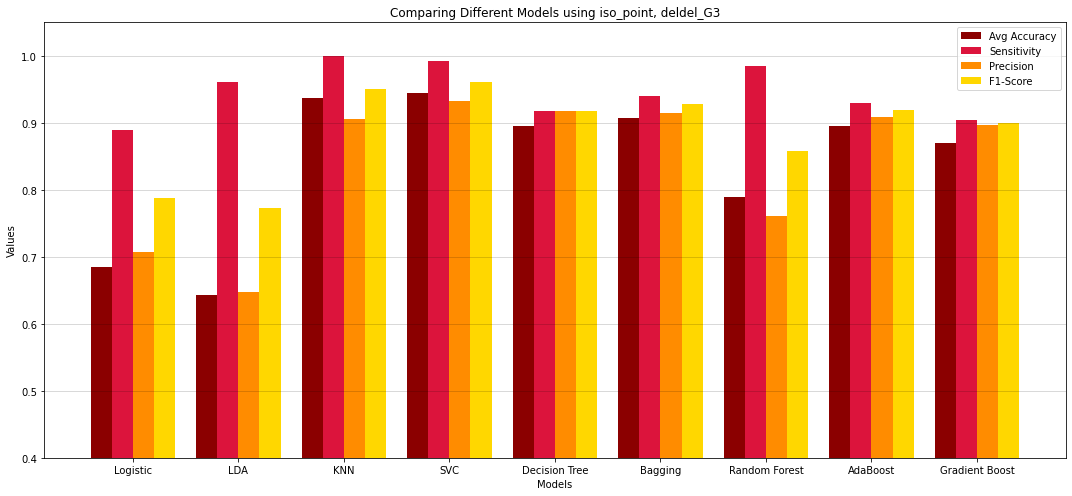

In [7]:
ML_compare_variables_barGraph([LogisticRegression(solver= 'liblinear', class_weight = 'balanced'),
                               LinearDiscriminantAnalysis(),
                               neighbors.KNeighborsClassifier(n_neighbors = 3),
                               SVC(C=6, kernel='rbf'),
                              DecisionTreeClassifier(),
                              BaggingClassifier(),
                              RandomForestClassifier(max_depth = 1),
                              AdaBoostClassifier(n_estimators=100, learning_rate = 0.1, algorithm="SAMME.R"),
                              GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 4)],
                     [["iso_point","deldel_G3"]])

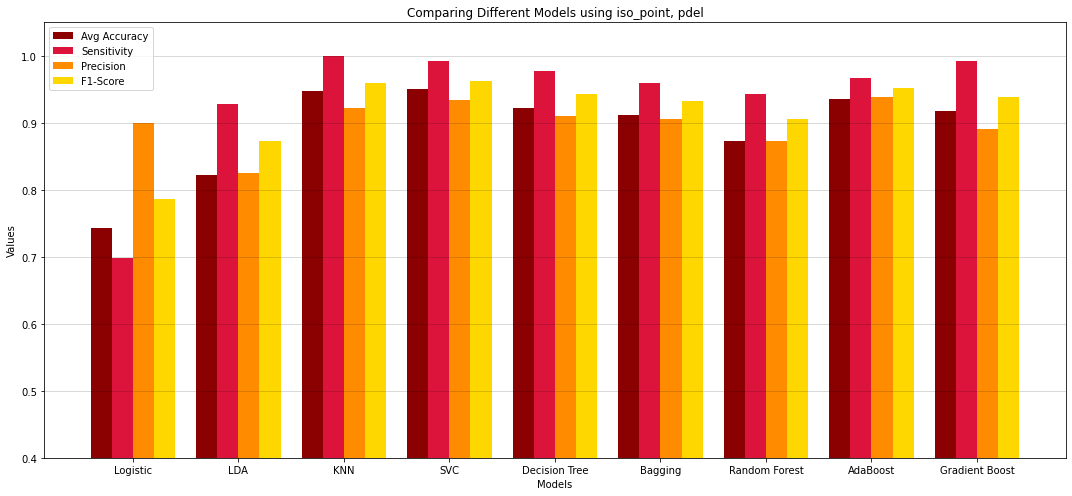

In [8]:
ML_compare_variables_barGraph([LogisticRegression(solver= 'liblinear', class_weight = 'balanced'),
                               LinearDiscriminantAnalysis(),
                               neighbors.KNeighborsClassifier(n_neighbors = 3),
                               SVC(C=6, kernel='rbf'),
                              DecisionTreeClassifier(),
                              BaggingClassifier(),
                              RandomForestClassifier(max_depth = 1),
                              AdaBoostClassifier(n_estimators=100, learning_rate = 0.1, algorithm="SAMME.R"),
                              GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 4)],
                     [["iso_point","pdel"]])

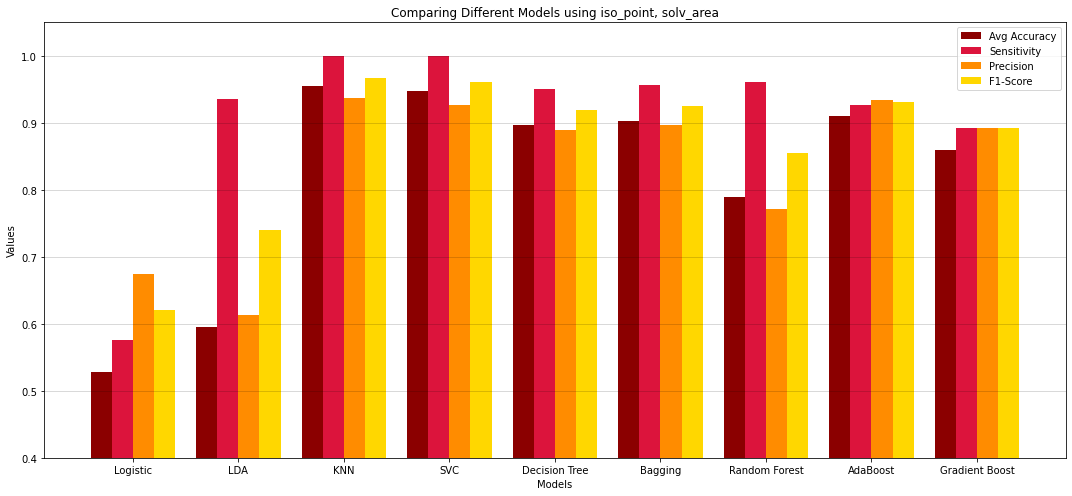

In [9]:
ML_compare_variables_barGraph([LogisticRegression(solver= 'liblinear', class_weight = 'balanced'),
                               LinearDiscriminantAnalysis(),
                               neighbors.KNeighborsClassifier(n_neighbors = 3),
                               SVC(C=6, kernel='rbf'),
                              DecisionTreeClassifier(),
                              BaggingClassifier(),
                              RandomForestClassifier(max_depth = 1),
                              AdaBoostClassifier(n_estimators=100, learning_rate = 0.1, algorithm="SAMME.R"),
                              GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 4)],
                     [["iso_point","solv_area"]])

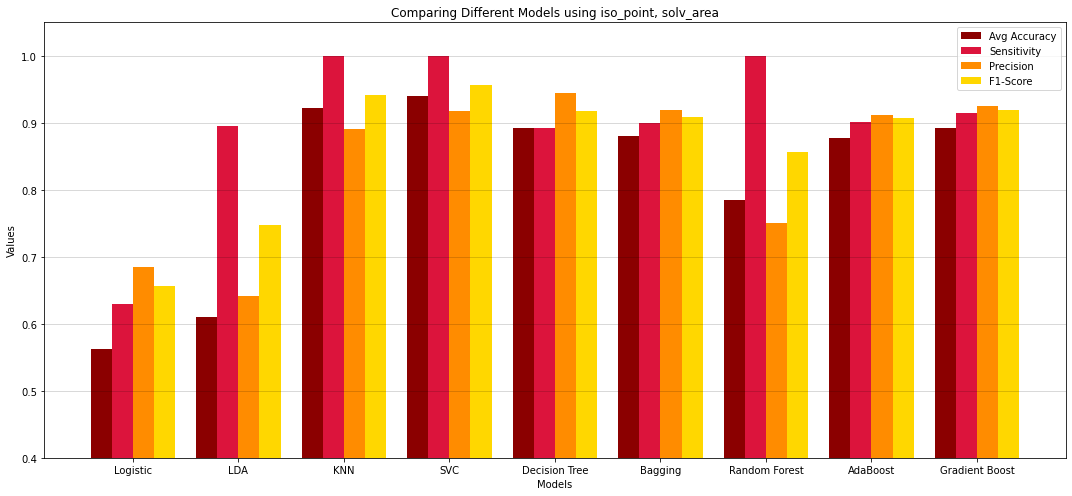

In [10]:
ML_compare_variables_barGraph([LogisticRegression(solver= 'liblinear', class_weight = 'balanced'),
                               LinearDiscriminantAnalysis(),
                               neighbors.KNeighborsClassifier(n_neighbors = 3),
                               SVC(C=6, kernel='rbf'),
                              DecisionTreeClassifier(),
                              BaggingClassifier(),
                              RandomForestClassifier(max_depth = 1),
                              AdaBoostClassifier(n_estimators=100, learning_rate = 0.1, algorithm="SAMME.R"),
                              GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 4)],
                     [["iso_point","solv_area"]])

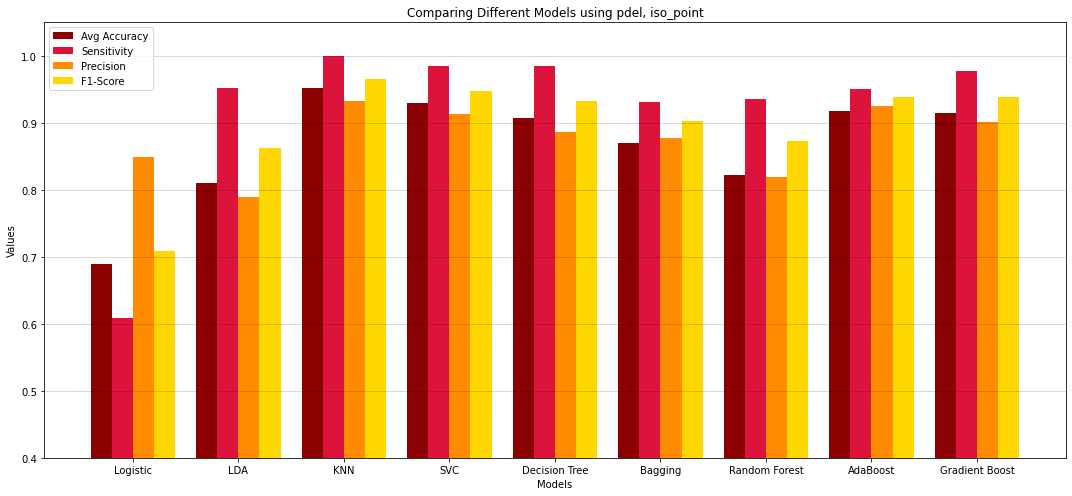

In [12]:
ML_compare_variables_barGraph([LogisticRegression(solver= 'liblinear', class_weight = 'balanced'),
                               LinearDiscriminantAnalysis(),
                               neighbors.KNeighborsClassifier(n_neighbors = 3),
                               SVC(C=6, kernel='rbf'),
                              DecisionTreeClassifier(),
                              BaggingClassifier(),
                              RandomForestClassifier(max_depth = 1),
                              AdaBoostClassifier(n_estimators=100, learning_rate = 0.1, algorithm="SAMME.R"),
                              GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 4)],
                     [["pdel","iso_point"]])